# IMDB Classification

This notebook will classify reviews from the IMDB dataset (https://www.imdb.com/interfaces/)
Each review in this dataset is labeled as positive or negative. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers

# Load data

We will only keep the top 10 000 most frequently occuring words, the more manageable vector sizes.

Label:
  * 1 - positive review
  * 0 - negative review

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [8]:
print(train_data[0][:10])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1


## Decode the review

the indices 0,1,2 are reserved for "padding", "start of sequence" and "unknown"

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# Prepare data

In this notebook we will use one-hot encoding. The whole review will be encoded as a single vector with 0s and 1s. 1 at given index means that the is at least one word in the review with given index.

Since we have 10K words, this will be our input vector size

We also reserve first 10K reviews for validation set.

In [18]:
def vectorize_sequences(reviews, dimension=10000):
    results = np.zeros((len(reviews), dimension))
    for i, review in enumerate(reviews):
        results[i, review] = 1
    return results

x = vectorize_sequences(train_data)
y = np.asarray(train_labels).astype('float32')
x_val = x[:10000]
y_val = y[:10000]
x_train = x[10000:]
y_train = y[10000:]

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

# Create ANN

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=[10000]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


# Train the model

In [21]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.5092 - acc: 0.7803 - val_loss: 0.3803 - val_acc: 0.8699
Epoch 2/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.3010 - acc: 0.9044 - val_loss: 0.2998 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.2174 - acc: 0.9283 - val_loss: 0.3080 - val_acc: 0.8723
Epoch 4/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1744 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.1418 - acc: 0.9543 - val_loss: 0.2850 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1139 - acc: 0.9656 - val_loss: 0.3099 - val_acc: 0.8804
Epoch 7/20
15000/15000 [==============================] - 2s 166us/step - loss: 0.0969 - acc: 0.9706 - val_loss: 0.3149 - 

# Plot the history of training

## Loss

Lets first looks at the loss function

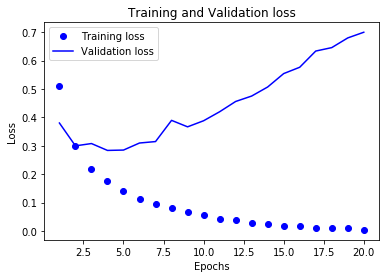

In [24]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuracy

And now let's check accuracy

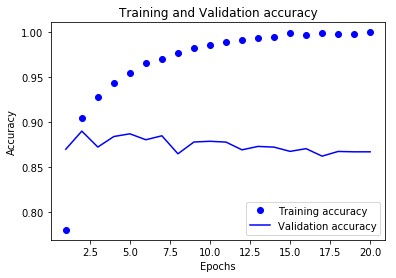

In [25]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the plots it looks that we have problem with overfitting.

One way of figthing with overfitting is early stopping

In [27]:
history = model.fit(x_train, y_train, epochs=3, batch_size=512, validation_data=(x_val, y_val))
model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 150us/step - loss: 0.0046 - acc: 0.9985 - val_loss: 0.8446 - val_acc: 0.8621
Epoch 2/3
15000/15000 [==============================] - 2s 129us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.8539 - val_acc: 0.8622
Epoch 3/3
25000/25000 [==============================] - 6s 245us/step


[0.97706759721517566, 0.84528000000000003]

Since this is binary classification and both classes are represented by the same number of classes, then base score is 50%.

The state of the art models are around ~95%. 

Our naive implementation achives (poor) score 84%